In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

In [9]:
X_data = pd.DataFrame(X)
X_data.head()

,0,1,2,3,4
0,0.975120,-0.677162,-0.012247,-0.897254,0.075805
1,0.081874,-0.485364,0.758969,-0.772825,-0.236819
2,-1.412304,-0.908024,-0.562288,-1.012831,0.314247
3,-0.645120,0.361636,1.356240,-0.072010,1.003533
4,-0.622700,0.280992,-1.952088,-0.151785,0.588317


In [10]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [12]:
X_data.describe()

,0,1,2,3,4
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.032202,0.128058,-0.044747,0.076954,-0.093874
std,1.072806,0.959556,0.900352,0.984110,0.983943
min,-2.619745,-1.913280,-1.952088,-2.301921,-3.241267
25%,-0.757046,-0.536288,-0.734897,-0.678136,-0.700307
50%,-0.145714,0.152465,-0.010110,0.066421,-0.024662
75%,0.648170,0.667929,0.524237,0.830645,0.532419
max,3.852731,3.078881,2.314659,1.886186,2.122156


In [13]:
y

array([ -72.84025434,  -56.76950471, -264.33077026,  118.55916727,
       -120.19600589, -149.98103668,  112.42727709,   40.1701236 ,
       -141.96820478,  -73.67585194,   10.33407479, -345.71988595,
        -69.26637873, -118.78707947,    2.15209112,  126.82714045,
          0.91458995, -261.27203996,   46.56292086,  -25.52378711,
         77.68993478,   28.4610334 ,  -28.25812943,  150.84037433,
        167.08996381,  295.6546016 ,   13.73039315,  153.25504284,
       -198.51048771,  308.4024102 , -118.62218893,   31.02504019,
         -3.7183791 ,   41.02054897,  168.77726012,  -65.85188352,
        124.15090375,  -35.99993997,  127.85512023,   55.15041248,
       -147.6368684 ,   12.45236531,    3.57518675,   86.51045456,
        409.19935965,  180.251948  ,  348.46107807,  -50.80554605,
        -57.83463804,  189.74648505,   16.70388767, -101.20010675,
         -2.46268941, -298.23221487, -270.68329157, -225.81587435,
         47.46176791,   98.27210498, -131.89441301,   68.44456

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "L1 (Lasso) Regression": Lasso(alpha=0.2),
    "L2 (Ridge) Regression": Ridge(alpha=1.0)
}

In [21]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Coefficients: {model.coef_}")
    print(f"{name} MSE: {mean_squared_error(y_test, y_pred):.2f}\n")

Linear Regression Coefficients: [61.52208912 98.47253675 61.09969936 55.54150072 35.97411246]
Linear Regression MSE: 113.45

L1 (Lasso) Regression Coefficients: [61.35433089 98.22257653 60.77197456 55.33779305 35.80604934]
L1 (Lasso) Regression MSE: 113.72

L2 (Ridge) Regression Coefficients: [60.80641691 96.97650095 59.85083263 54.82588222 35.69887237]
L2 (Ridge) Regression MSE: 121.65



In [22]:
coeffs = [model.coef_ for model in models.values()]
labels = list(models.keys())

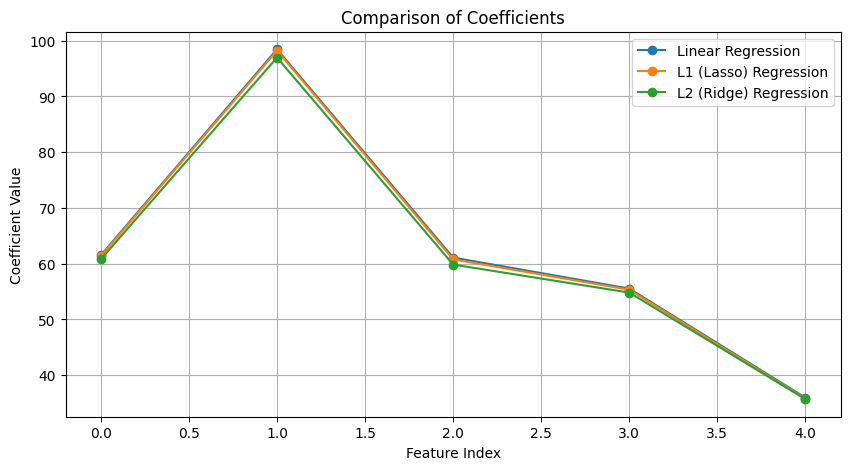

In [23]:
plt.figure(figsize=(10, 5))
for i, c in enumerate(coeffs):
    plt.plot(c, marker='o', label=labels[i])
plt.title("Comparison of Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()